
Now in this Task we will be implementing the Gaussian Bayes Classifier for continuous attributes


In [6]:
%pylab inline
import scipy.stats as ss
import numpy as np
import math
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [20]:
class GaussianBayes:
    
    classes=[]
    def __init__(self):   #Constructor
        pass
    def train(self,splitClass):  
        cov=[]
        mean=[]
        for x in range(len(self.classes)):      
            cov.append(np.cov((splitClass[x]).T))         
            mean.append(np.mean(splitClass[x],axis=0))
        return cov,mean
        
    def splitClasses(self,X,Y):
        splitClass=[]
        for l in range(len(self.classes)):
            index=(Y==self.classes[l])
            list=X[index]
            splitClass.append(list)
        return splitClass
                
    def priorProb(self,X,Y):
        self.classes=np.unique(Y)
        prior=[]
        classesFrequency=[]
        length=len(self.classes)
        for ind in range(length):
            classesFrequency.append(list(Y).count(self.classes[ind]))
            prior.append(float(classesFrequency[ind])/len(Y))
        return prior
        
    def likelyHood(self,x,k,covv,meann):
        invcov=np.linalg.inv(covv)
        detcov=np.linalg.det(covv)
        pNum=np.dot((x-meann),invcov)
        pNum1=np.dot(pNum,(x-meann).T)
        ePow=pNum1/2
        ePow1=-ePow
        num1=math.pow(math.e,ePow1)
        den1=math.pow(math.sqrt(2*math.pi),k)
        den2=math.sqrt(detcov)
        den=den1*den2
        num2=1/den
        Ans=num2*num1
        return Ans
    
    def test(self, X,prior,cov,mean):

        nexamples, nfeatures=X.shape
        pclasses=[0]*nexamples
        
        # your code go here...
        for index in range(nexamples):
            likelyhood=[]
            classesProb=[]
            for count in range(len(self.classes)):
                likelyhood.append(self.likelyHood(X[index],nfeatures,cov[count],mean[count]))
            for i in range(len(prior)):
                classesProb.append(likelyhood[i]*prior[i])
            maxi=classesProb.index(max(classesProb)) 
            pclasses[index]=self.classes[maxi]
        return np.array(pclasses)
    

        

In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

In [4]:
#load the data set
data=pd.read_csv('iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [7]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   


 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


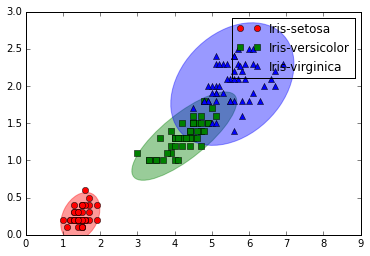

In [487]:
#Lets plot the Complete data...
# Remember seeing is believing
t.plotCov(X[:,2:],Y)

Our goal will be to measure the parameters of these Multinomial Gaussians during training...

Training Time
========
Let's train a Gaussian Bayes, first train using any only two attributes.
- What Two Attributes to use ? Any Guess, we will be using petal length and width...

In [8]:
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)
print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   

 Training Data Set Dimensions= (104L, 4L) Training True Class labels dimensions (104L,)
 Test Data Set Dimensions= (45L, 4L) Test True Class labels dimensions (104L,)


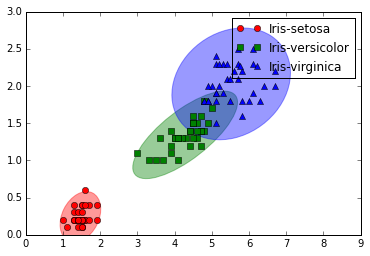

In [47]:
#Lets plot only the training data...
t.plotCov(Xtrain[:,2:],Ytrain)

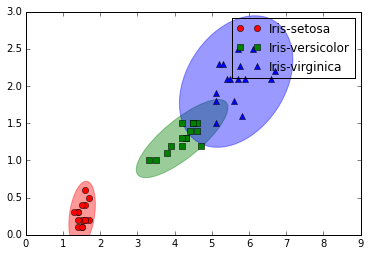

In [15]:
#Lets plot only the test data, see both the training and test sets are disjoint...
t.plotCov(Xtest[:,2:],Ytest)

In [21]:
# Lets train a Gaussian Bayes Classifier on Petal Length and Width
gb=GaussianBayes()
prior=gb.priorProb(X,Y)
split=gb.splitClasses(Xtrain[:,2:],Ytrain)
cov,mean=gb.train(split)

In [49]:
#Lets test it on the set of unseen examples...
pclasses=gb.test(Xtest[:,2:],prior,cov,mean)

Lets see how good we are doing...
==================

In [50]:
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

43
Accuracy =  0.955555555556


In [12]:
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Training Set... 


ValueError: 'I' is not in list

In [ ]:
print " Plotting the Decision Surface of Test Set... "
t.plot_decision_regions(Xtest[:,2:],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

In [51]:
# Lets go and use all the four attributes...
fgb=GaussianBayes()
prior=fgb.priorProb(X,Y)
split=fgb.splitClasses(Xtrain,Ytrain)
cov,mean=fgb.train(split)

In [52]:

pclasses=fgb.test(Xtest,prior,cov,mean)

In [53]:
# Using all four attributes, accuracy is 
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

43
Accuracy =  0.955555555556


# Now Let's change the features:

Simply use only the sepal-length and width as features and repeat the complete training and test cycle and report your performance with the decision regions plot... 


In [54]:
gb=GaussianBayes()
prior=gb.priorProb(X,Y)
split=gb.splitClasses(Xtrain[:,:2],Ytrain)
cov,mean=gb.train(split)

In [55]:
pclasses=gb.test(Xtest[:,:2],prior,cov,mean)

In [56]:
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

36
Accuracy =  0.8


#Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

In [57]:
# Now lets cross validate, and test the result...
# We will be training four different models on four different partitions of data set and 
# then will be reporting the mean accuracy of the four classifiers.

nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[2, 3] # features to use for our system
#now lets train and test on these folds...
totacc=[]
for ka in range(nfolds):
    gb=GaussianBayes()
    gb.priorProb(X,Y)
    split=gb.splitClasses(folds[ka][0][:,features],folds[ka][1])
    cov,mean=gb.train(split)
    pclasses=gb.test(folds[ka][2][:,features],prior,cov,mean)
    acc=np.sum(pclasses==folds[ka][3])/float(folds[ka][3].shape[0])
    print "[Info] Fold {} Accuracy = {}".format(ka+1, acc)
    totacc.append(acc)

print totacc, '\n Mean Accuracy =', np.mean(totacc)

Generating CV data for 3 classes
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 1.0
[Info] Fold 3 Accuracy = 0.916666666667
[Info] Fold 4 Accuracy = 1.0
[0.97222222222222221, 1.0, 0.91666666666666663, 1.0] 
 Mean Accuracy = 0.972222222222
